In [4]:
# !pip install textblob
from textblob import TextBlob

In [ ]:
blob = TextBlob("Ahh, I lost my favourite pencil")

In [16]:
TextBlob("This is my favrite pencil").correct()

TextBlob("His is my favorite pencil")

In [18]:
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [19]:
blob.sentiment_assessments

Sentiment(polarity=0.0, subjectivity=0.0, assessments=[])

In [ ]:
# !python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\hp328\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp328\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp328\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hp328\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\hp328\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\hp328\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [23]:
blob.tags

[('Ahh', 'NNP'),
 ('I', 'PRP'),
 ('lost', 'VBD'),
 ('my', 'PRP$'),
 ('favourite', 'JJ'),
 ('pencil', 'NN')]

In [25]:
TextBlob("I go for a run daily in the morning.").tags

[('I', 'PRP'),
 ('go', 'VBP'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('run', 'JJ'),
 ('daily', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('morning', 'NN')]

In [27]:
TextBlob("My laptop fan is making a lot of noise.").noun_phrases

WordList(['laptop fan'])

In [30]:
TextBlob("I go for a run daily in the mornning.").correct()

TextBlob("I go for a run daily in the morning.")

In [35]:
dir(TextBlob("text"))

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cmpkey',
 '_compare',
 '_create_sentence_objects',
 '_strkey',
 'analyzer',
 'classifier',
 'classify',
 'correct',
 'ends_with',
 'endswith',
 'find',
 'format',
 'index',
 'join',
 'json',
 'lower',
 'ngrams',
 'noun_phrases',
 'np_counts',
 'np_extractor',
 'parse',
 'parser',
 'polarity',
 'pos_tagger',
 'pos_tags',
 'raw',
 'raw_sentences',
 'replace',
 'rfind',
 'rindex',
 'sentences',
 'sentiment',
 'sentiment_assessments',
 'serialized',
 'split',
 'starts_with',
 'startswith',
 'string',
 'strip',
 'stripped',
 'subjectivity'

In [36]:
# Sample tweets
tweets = [
    "I love the new iPhone! It's awesome!",
    "I hate this weather, it's so gloomy.",
    "This movie was okay, not the best, but decent.",
    "I feel amazing today, everything is going great!",
]

# Analyze sentiment of each tweet
for tweet in tweets:
    blob = TextBlob(tweet)
    sentiment = blob.sentiment
    print(f"Tweet: {tweet}")
    print(
        f"Sentiment: Polarity = {sentiment.polarity}, Subjectivity = {sentiment.subjectivity}"
    )
    print("-" * 50)

Tweet: I love the new iPhone! It's awesome!
Sentiment: Polarity = 0.5568181818181818, Subjectivity = 0.6848484848484849
--------------------------------------------------
Tweet: I hate this weather, it's so gloomy.
Sentiment: Polarity = -0.8, Subjectivity = 0.9
--------------------------------------------------
Tweet: This movie was okay, not the best, but decent.
Sentiment: Polarity = 0.5555555555555556, Subjectivity = 0.48888888888888893
--------------------------------------------------
Tweet: I feel amazing today, everything is going great!
Sentiment: Polarity = 0.8, Subjectivity = 0.825
--------------------------------------------------


In [5]:
def analyze_sentiment(text):
    blob = TextBlob(text)

    polarity = blob.sentiment.polarity

    if polarity>0:
        return f"positive sentiment {polarity=}"
    elif polarity==0:
        return "neutral sentiment"
    else:
        return f"negative sentiment {polarity=}"
    

In [6]:
analyze_sentiment("I love programming")

'positive sentiment polarity=0.5'

In [7]:
analyze_sentiment("I am so happy")

'positive sentiment polarity=0.8'

In [8]:
analyze_sentiment("Today is a sunny day")

'neutral sentiment'

In [9]:
analyze_sentiment("Ohh, there is my exam today")

'neutral sentiment'

In [11]:
analyze_sentiment("ahh, I lost my favourite pencil")

'neutral sentiment'

In [12]:
analyze_sentiment("I am so sad today")

'negative sentiment polarity=-0.5'

In [37]:
TextBlob("Tommorrow was very boring").sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [39]:
TextBlob("Tommorrow was interesting").sentiment

Sentiment(polarity=0.5, subjectivity=0.5)

In [38]:
TextBlob("Tommorrow was a little boring").sentiment

Sentiment(polarity=-0.59375, subjectivity=0.75)

In [1]:
import numpy as np
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords

In [2]:
import pandas as pd

df = pd.read_csv("data/sentiment_analysis.csv")
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [4]:
df = df[['text','sentiment']]

In [6]:
df

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative
...,...,...
494,"According to , a quarter of families under six...",negative
495,the plan to not spend money is not going well,negative
496,uploading all my bamboozle pictures of facebook,neutral
497,congratulations ! you guys finish a month ear...,positive


In [8]:
# NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower() # Convert to lowercase
    words = text.split() # Tokenize text by splitting
    words = [word for word in words if word not in stop_words] 
    return " ".join(words)

# Clean all text
df['cleaned_text'] = df['text'].apply(clean_text)
print(df.head())


                                                text sentiment  \
0              What a great day!!! Looks like dream.  positive   
1     I feel sorry, I miss you here in the sea beach  positive   
2                                     Don't angry me  negative   
3  We attend in the class just for listening teac...  negative   
4                  Those who want to go, let them go  negative   

                                        cleaned_text  
0                     great day!!! looks like dream.  
1                         feel sorry, miss sea beach  
2                                              angry  
3  attend class listening teachers reading slide....  
4                                    want go, let go  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp328\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          499 non-null    object
 1   sentiment     499 non-null    object
 2   cleaned_text  499 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [34]:
df = df.drop_duplicates()

In [35]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['cleaned_text'])


X = tokenizer.texts_to_sequences(df['cleaned_text'])


X_pad = pad_sequences(X, padding='post', maxlen=50) 
print(X_pad[:2]) # Show the padded sequences for the first two text

[[ 42   5  55  10 446   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 43  36  33 241 242   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [36]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(df["sentiment"])
print(y[:5])  

[2 2 0 0 0]


In [39]:
model = Sequential()

model.add(Embedding(input_dim=10000, output_dim=128, input_length=50))

model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pad, y, test_size=0.2, random_state=41, shuffle=True
)
# Train the model
history = model.fit(
    X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test)
)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.3746 - loss: 0.6141 - val_accuracy: 0.3544 - val_loss: 0.1903
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.3881 - loss: 0.0394 - val_accuracy: 0.3544 - val_loss: -0.3199
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.3758 - loss: -0.3759 - val_accuracy: 0.3544 - val_loss: -0.4804
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.3936 - loss: -0.3983 - val_accuracy: 0.3544 - val_loss: -0.6204
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.3675 - loss: -0.7030 - val_accuracy: 0.3544 - val_loss: -0.7985


In [41]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3452 - loss: -0.7442
Test Loss: -0.7985023856163025
Test Accuracy: 0.3544303774833679


In [42]:
new_text = ["I really enjoyed the movie, it was fantastic!"]

# Preprocess and predict
new_text_cleaned = [clean_text(text) for text in new_text]
new_text_seq = tokenizer.texts_to_sequences(new_text_cleaned)
new_text_pad = pad_sequences(new_text_seq, padding="post", maxlen=50)

# Predict the sentiment (0 = Negative, 1 = Positive)
prediction = model.predict(new_text_pad)
print("Predicted Sentiment:", "Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Predicted Sentiment: Positive


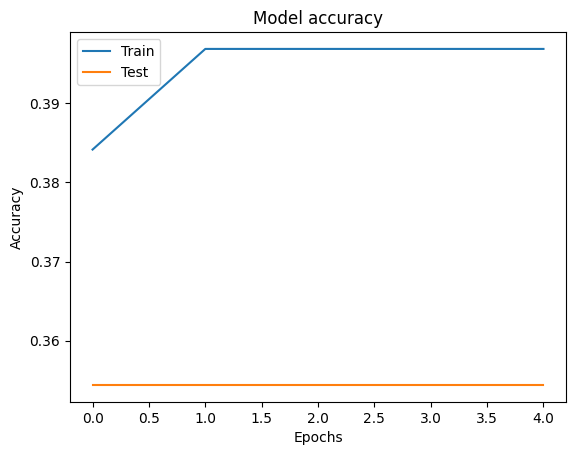

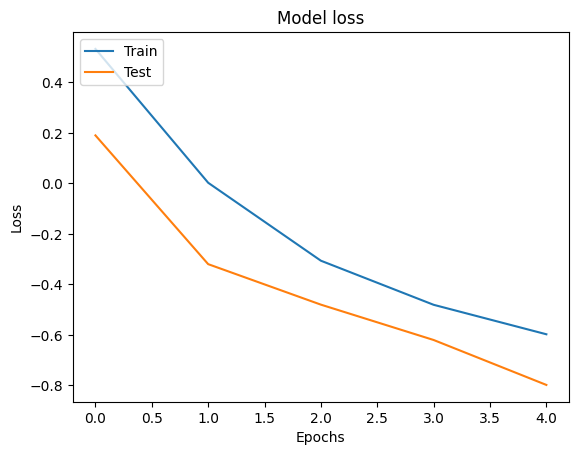

In [43]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()